### Importación de datos



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs for the data from different stores
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Reading the CSV files for each store
store1 = pd.read_csv(url1)
store2 = pd.read_csv(url2)
store3 = pd.read_csv(url3)
store4 = pd.read_csv(url4)

# Display the first few rows of store1's data
store1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [24]:
# Function to format a number as currency
def format_currency(amount):
    return '${:,.2f}'.format(amount)

# Calculate the total sales (Price) for each store
total_store1 = store1['Precio'].sum()
total_store2 = store2['Precio'].sum()
total_store3 = store3['Precio'].sum()
total_store4 = store4['Precio'].sum()

# Print the results
print(f"Total sales Store 1: {format_currency(total_store1)}")
print(f"Total sales Store 2: {format_currency(total_store2)}")
print(f"Total sales Store 3: {format_currency(total_store3)}")
print(f"Total sales Store 4: {format_currency(total_store4)}")



Total sales Store 1: $1,150,880,400.00
Total sales Store 2: $1,116,343,500.00
Total sales Store 3: $1,098,019,600.00
Total sales Store 4: $1,038,375,700.00


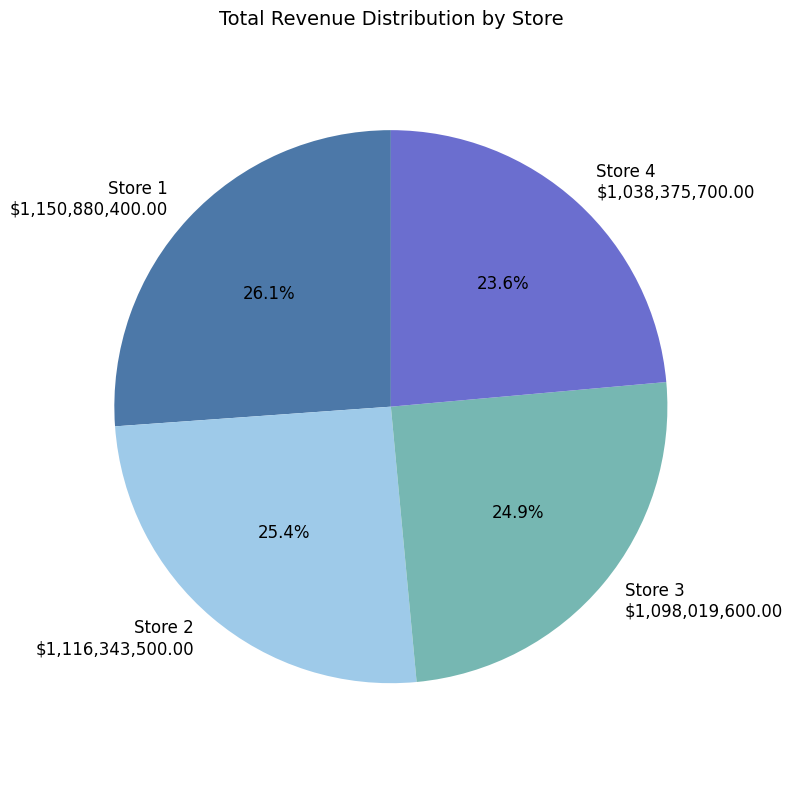

In [25]:
# Prepare data for the pie chart
totals = [total_store1, total_store2, total_store3, total_store4]
store_names = ['Store 1', 'Store 2', 'Store 3', 'Store 4']
colors = ['#4c78a8', '#9ecae9', '#76b7b2', '#6b6ecf']
# Check if there is valid data
if sum(totals) <= 0:
  print("Error: No valid data to generate the pie chart.")
else:
  # Create the pie chart
  plt.figure(figsize=(8, 8))
  # Generate labels with store name and formatted currency value
  labels = [f"{name}\n{format_currency(total)}" for name, total in zip(store_names, totals)]
  plt.pie(totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
  plt.title('Total Revenue Distribution by Store', fontsize=14)
  # Ensure the pie is a circle
  plt.axis('equal')
  # Adjust layout and save the figure
  plt.tight_layout()
  plt.savefig('revenue_distribution_by_store.png')
  plt.show()

# 2. Ventas por categoría

In [26]:
# List of stores with their data and names
stores = [
    (store1, "Store 1"),
    (store2, "Store 2"),
    (store3, "Store 3"),
    (store4, "Store 4")
]

# List to store sales data by category for all stores
all_store_sales = []
unique_categories = set()

# Process each store
for df, store_name in stores:
    # Group by Product Category and count sales
    sales_by_category = df.groupby('Categoría del Producto').size().reset_index(name='Units Sold')

    # Sort by number of units sold, descending
    sales_by_category = sales_by_category.sort_values(by='Units Sold', ascending=False)

    # Reset index
    sales_by_category = sales_by_category.reset_index(drop=True)

    # Show results
    print(f"\n{store_name} - Sales by Category:")
    print(sales_by_category)

    # Print the most sold category
    if not sales_by_category.empty:
        top_category = sales_by_category.iloc[0]['Categoría del Producto']
        top_quantity = sales_by_category.iloc[0]['Units Sold']
        print(f"Top selling category in {store_name}: {top_category} ({top_quantity} sales)")
    else:
        print(f"No sales data for {store_name}")

    # Add data to the list for the chart
    all_store_sales.append((store_name, sales_by_category))

    # Update the set of unique categories
    unique_categories.update(sales_by_category['Categoría del Producto'])


Store 1 - Sales by Category:
    Categoría del Producto  Units Sold
0                  Muebles         465
1             Electrónicos         448
2                 Juguetes         324
3        Electrodomésticos         312
4     Deportes y diversión         284
5   Instrumentos musicales         182
6                   Libros         173
7  Artículos para el hogar         171
Top selling category in Store 1: Muebles (465 sales)

Store 2 - Sales by Category:
    Categoría del Producto  Units Sold
0                  Muebles         442
1             Electrónicos         422
2                 Juguetes         313
3        Electrodomésticos         305
4     Deportes y diversión         275
5   Instrumentos musicales         224
6                   Libros         197
7  Artículos para el hogar         181
Top selling category in Store 2: Muebles (442 sales)

Store 3 - Sales by Category:
    Categoría del Producto  Units Sold
0                  Muebles         499
1             Electrónic

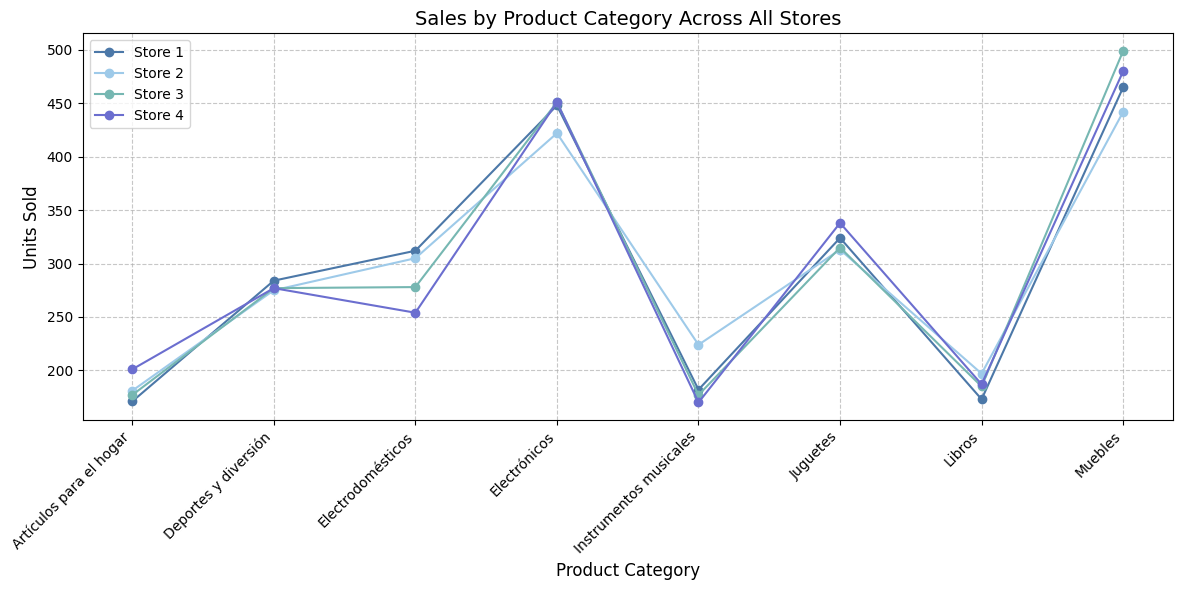

In [27]:
# Convert unique categories to a sorted list
unique_categories = sorted(unique_categories)

# Prepare data for the line chart
plt.figure(figsize=(12, 6))
colors = ['#4c78a8', '#9ecae9', '#76b7b2', '#6b6ecf']

# Plot one line per store
for (store_name, sales_by_category), color in zip(all_store_sales, colors):
  # Create a dictionary mapping categories to units sold
  sales_dict = dict(zip(sales_by_category['Categoría del Producto'], sales_by_category['Units Sold']))

  # Create a list of units sold, filling in 0 for missing categories
  quantities = [sales_dict.get(category, 0) for category in unique_categories]

  # Plot the line
  plt.plot(unique_categories, quantities, marker='o', label=store_name, color=color)

# Configure the chart
plt.title('Sales by Product Category Across All Stores', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('sales_by_category.png')
plt.show()

# 3. Calificación promedio de la tienda


In [28]:
# List to store average ratings per store (for the chart)
average_ratings = []
store_names = []

# Process each store
for df, store_name in stores:
  # Calculate the average rating
  avg_rating = df['Calificación'].mean()

  # Store the result for plotting
  average_ratings.append(float(avg_rating))
  store_names.append(store_name)

  # Display the average rating
  print(f"Average rating in {store_name}: {avg_rating:.2f}")

Average rating in Store 1: 3.98
Average rating in Store 2: 4.04
Average rating in Store 3: 4.05
Average rating in Store 4: 4.00


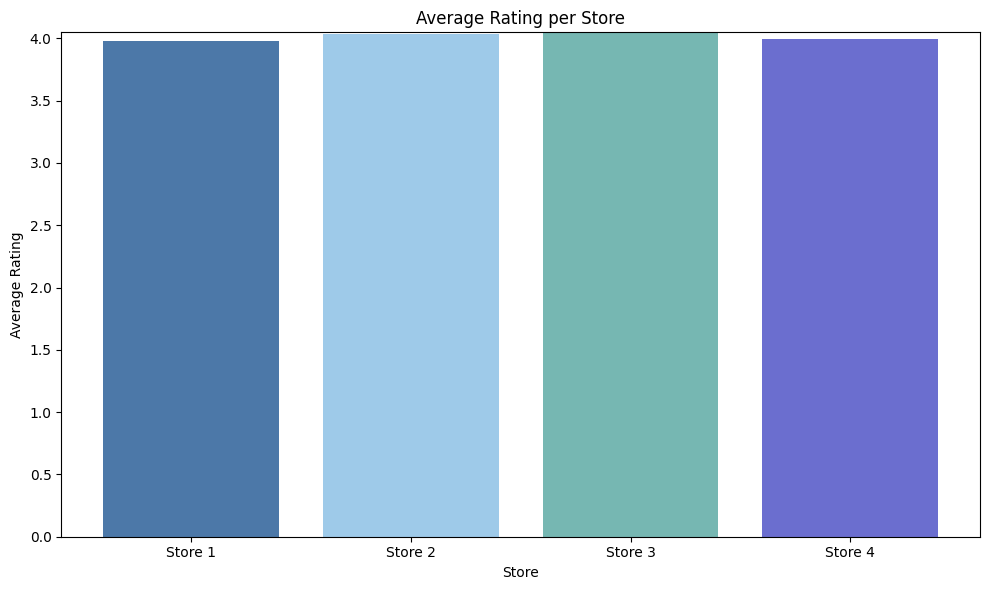

In [29]:
# List of colors for each bar (one per store)
colors =  ['#4c78a8', '#9ecae9', '#76b7b2', '#6b6ecf']

# Visualization of average ratings
plt.figure(figsize=(10, 6))
plt.bar(store_names, average_ratings, color=colors)
plt.title('Average Rating per Store')
plt.xlabel('Store')
plt.ylabel('Average Rating')

# Dynamically adjust the Y-axis based on the values
if average_ratings and max(average_ratings) > 0:
    plt.ylim(0, max(average_ratings) * 1)
else:
    plt.ylim(0, 5)  # Default max if no valid data
plt.tight_layout()
plt.savefig('average_rating_per_store.png')
plt.show()


# 4. Productos más y menos vendidos

In [30]:
# Process each store
for df, store_name in stores:
    # Group by Product and count sales
    sales_by_product = df.groupby('Producto').size().reset_index(name='Units Sold')

    # Sort by units sold in descending order
    sales_by_product = sales_by_product.sort_values(by='Units Sold', ascending=False)

    # Reset the index for a clean look
    sales_by_product = sales_by_product.reset_index(drop=True)

    # Check if there is data
    if sales_by_product.empty:
        print(f"\n{store_name} - No sales data available.")
        continue

    # Identify the best-selling product(s)
    max_sales = sales_by_product['Units Sold'].max()
    top_products = sales_by_product[sales_by_product['Units Sold'] == max_sales]['Producto'].tolist()

    # Identify the least-selling product(s)
    min_sales = sales_by_product['Units Sold'].min()
    bottom_products = sales_by_product[sales_by_product['Units Sold'] == min_sales]['Producto'].tolist()

    # Display results
    print(f"\n{store_name} - Sales by Product:")
    print(sales_by_product)
    print(f"Top-selling product(s): {', '.join(top_products)} ({max_sales} sales)")
    print(f"Least-selling product(s): {', '.join(bottom_products)} ({min_sales} sales)")





Store 1 - Sales by Product:
                       Producto  Units Sold
0                       Armario          60
1                 TV LED UHD 4K          60
2                    Microondas          60
3              Secadora de ropa          58
4                 Mesa de noche          56
5       Bloques de construcción          56
6           Balón de baloncesto          55
7                     Bicicleta          54
8                     Impresora          54
9                  Vaso térmico          54
10                 Refrigerador          54
11                      Batería          53
12                   Cubertería          52
13    Carrito de control remoto          52
14          Modelado predictivo          51
15                  Auriculares          50
16            Ajedrez de madera          49
17                    Iphone 15          49
18                 Lavavajillas          48
19           Guitarra eléctrica          47
20             Lavadora de ropa          47
21 

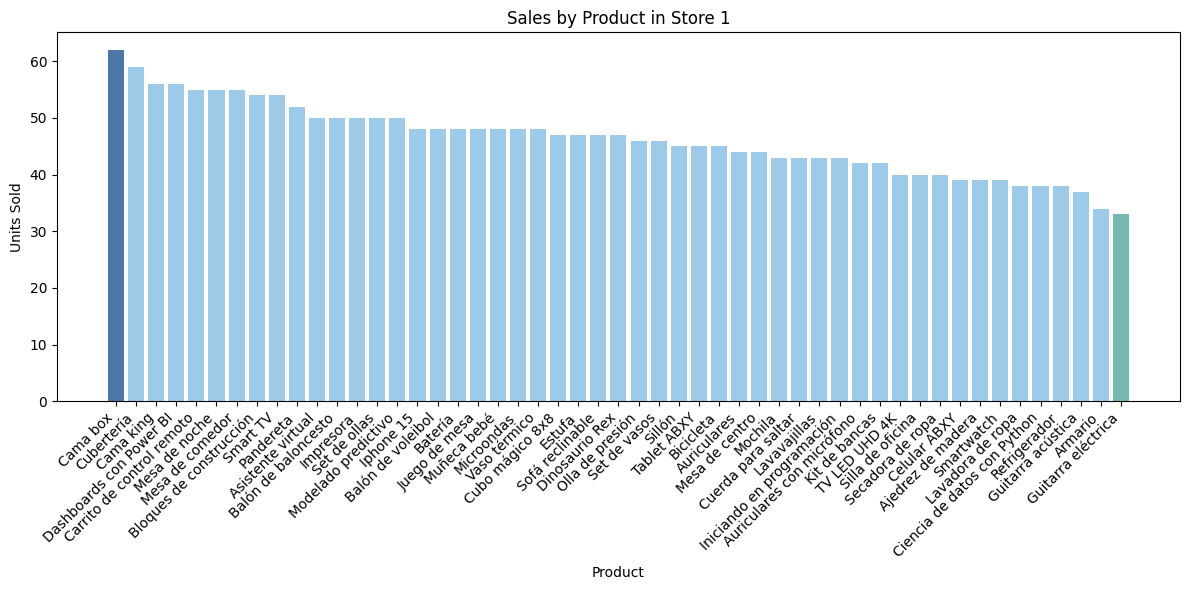

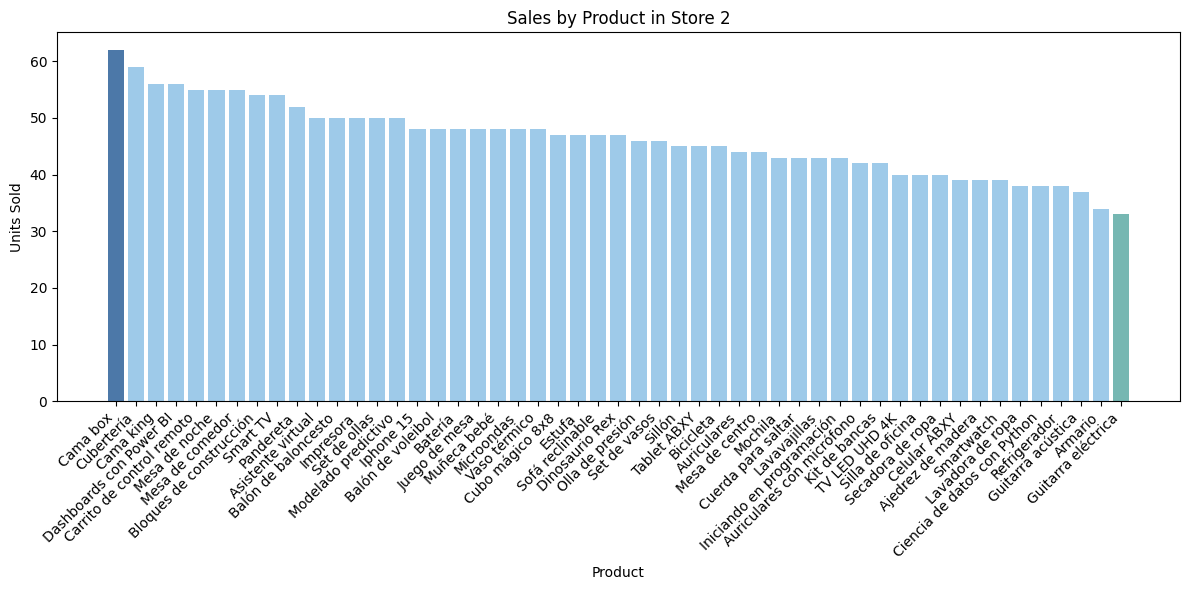

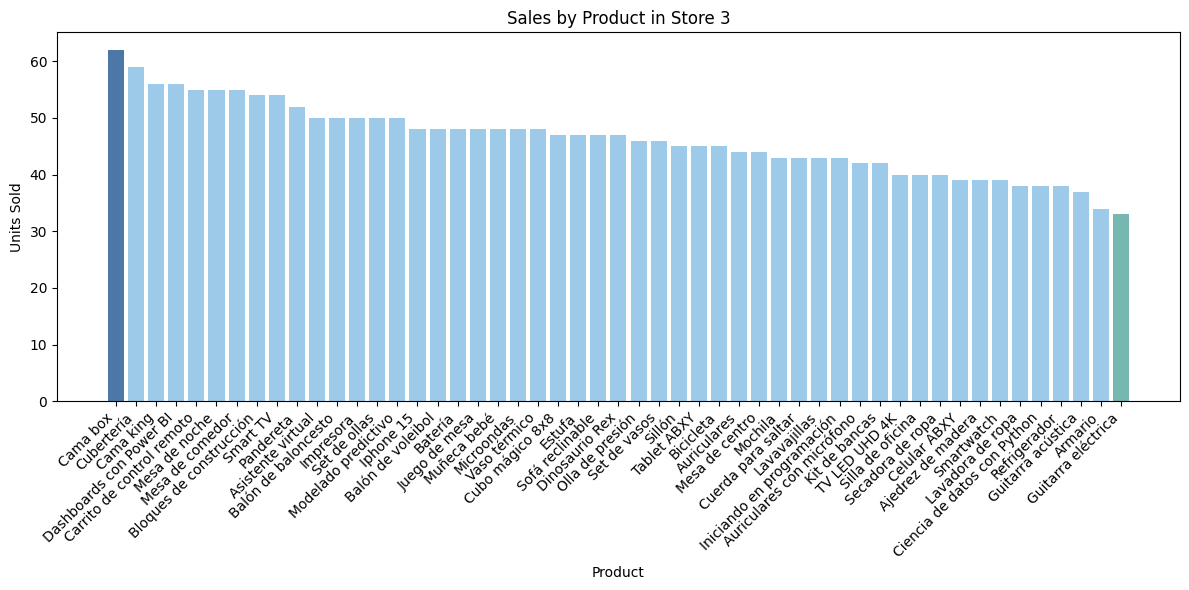

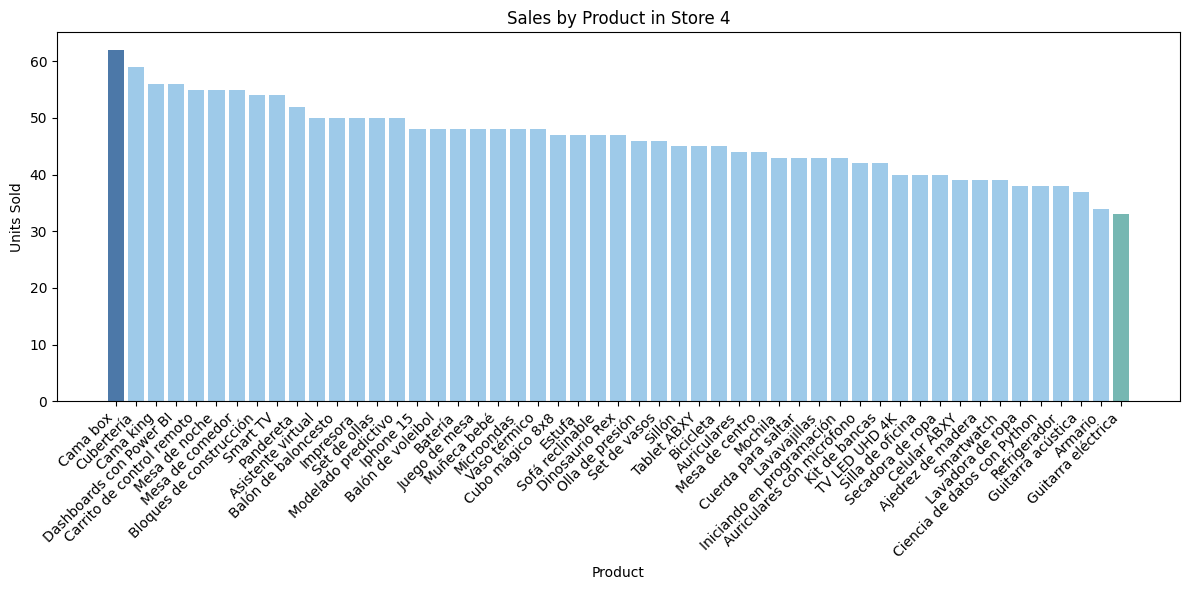

In [31]:
for df, store_name in stores:
    # Visualization
    plt.figure(figsize=(12, 6))
    # Create color list: green for top-selling, red for least-selling, grey for others
    bar_colors = []
    for _, row in sales_by_product.iterrows():
        if row['Producto'] in top_products:
            bar_colors.append('#4c78a8')  # Green for top-selling
        elif row['Producto'] in bottom_products:
            bar_colors.append('#76b7b2')  # Red for least-selling
        else:
            bar_colors.append('#9ecae9')  # Grey for others

    # Create the bar chart
    plt.bar(sales_by_product['Producto'], sales_by_product['Units Sold'], color=bar_colors)
    plt.title(f'Sales by Product in {store_name}')
    plt.xlabel('Product')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'sales_{store_name.replace(" ", "_").lower()}.png')
    plt.show()

# 5. Envío promedio por tienda

In [32]:
# List to store average shipping costs per store (for the chart)
average_shipping_costs = []
store_names = []

# Process each store
for df, store_name in stores:
  try:
    # Check if the 'Shipping Cost' column exists
    if 'Costo de envío' not in df.columns:
      print(f"Error: The column 'Costo de envío' does not exist in {store_name}")
      average_shipping_costs.append(0)
      store_names.append(store_name)
      continue

    # Convert 'Costo de envío' column to numeric, forcing errors to NaN
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

    # Calculate average shipping cost (ignoring NaN)
    avg_shipping_cost = df['Costo de envío'].mean()

    # Handle case of empty or all-NaN values
    if pd.isna(avg_shipping_cost):
      print(f"Warning: No valid shipping costs in {store_name}")
      avg_shipping_cost = 0

    # Store for the chart
    average_shipping_costs.append(avg_shipping_cost)
    store_names.append(store_name)
    # Display the average shipping cost
    print(f"Average shipping cost in {store_name}: {format_currency(avg_shipping_cost)}")

  except Exception as e:
    print(f"Error processing {store_name}: {e}")
    average_shipping_costs.append(0)
    store_names.append(store_name)

Average shipping cost in Store 1: $26,018.61
Average shipping cost in Store 2: $25,216.24
Average shipping cost in Store 3: $24,805.68
Average shipping cost in Store 4: $23,459.46


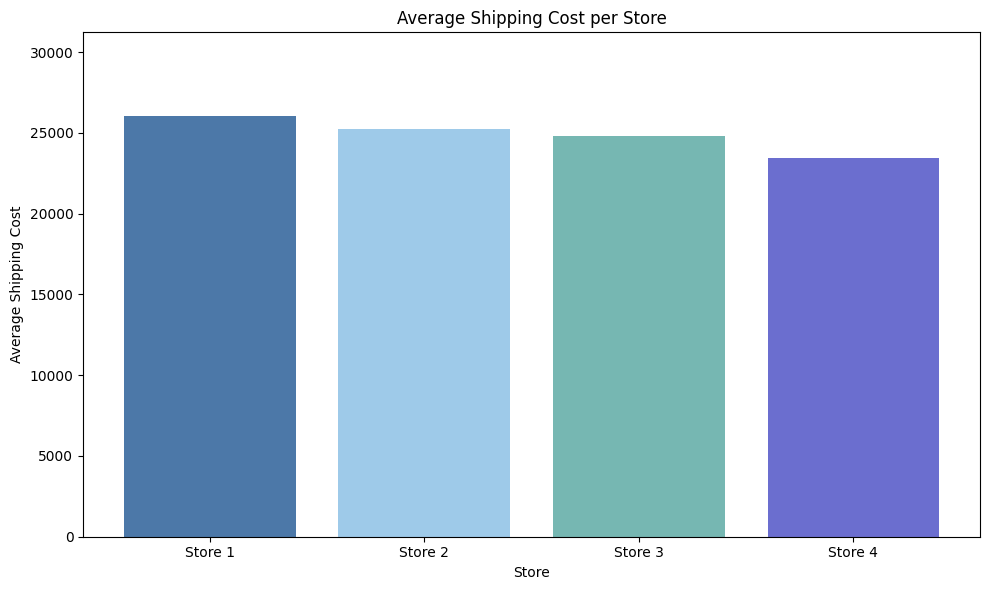

In [33]:
# Visualization of average shipping costs
plt.figure(figsize=(10, 6))
# Color list for each bar (one per store)
colors = ['#4c78a8', '#9ecae9', '#76b7b2', '#6b6ecf']
plt.bar(store_names, average_shipping_costs, color=colors)
plt.title('Average Shipping Cost per Store')
plt.xlabel('Store')
plt.ylabel('Average Shipping Cost')

# Dynamically adjust Y-axis based on values
if average_shipping_costs and max(average_shipping_costs) > 0:
  plt.ylim(0, max(average_shipping_costs) * 1.2)  # Add 20% extra for visibility
else:
  plt.ylim(0, 10)  # Default max if no valid data

plt.tight_layout()
plt.savefig('average_shipping_cost_per_store.png')
plt.show()